# Postal codes clustering of the city of London, UK, using the venues density

## Introduction

In this Project, using postal codes of the city of London extracted from wikipedia.com, I used the Foursquare API to find venues at all the postal codes. Using the K-Means clustering algorithm, the postal codes where grouped based on the venue density, with the results displayed on the geographical map of london. The result of this project could be useful in epidemiology reserch, real estate property cost estimation models, and bulding other machine learning models to predict the socio-demographic factors related to human settlement and mobility.

## Table of Contents
    
1. <a href="#item1">Extract data of London from Wikipedia</a>

2. <a href="#item2">Explore and clean neighborhoods dataset</a>
    
3. <a href="#item3">Get venues</a>
    
4. <a href="#item4">Analyze venues dataset</a>
    
5. <a href="#item5">Cluster Postcodes</a>
    
6. <a href="#item6">Examine Clusters</a>


In [ ]:
!conda install -c conda-forge folium=0.5.0 --yes

In [3]:
import numpy as np # data in a vectorized manner manipulation
import pandas as pd # data analsysis
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import json # JSON files manipulation
import requests # HTTP library
from bs4 import BeautifulSoup # scraping library

from sklearn.cluster import KMeans # clustering algorithm

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# !conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


<a id="item1"></a>

## 1. Extract data of London from Wikipedia

BeautifulSoup library is used to scrape the Wikipedia's article that contains the London neighborhood. The neighborhood data presented in a Table on the article is parsed and stored in a list that contains each row of the table, that is the Postcode, Borough and Neighborhood name.

In [4]:
url = "https://en.wikipedia.org/wiki/SE_postcode_area"

text_result = requests.get(url).text #get the entire html of the article as a str
html_parsed_result = BeautifulSoup(text_result, 'html.parser') #transform the text to html

neightborhood_info_table = html_parsed_result.find('table', class_ = 'wikitable')
neightborhood_rows = neightborhood_info_table.find_all('tr')

# extract the info ('Postcode', 'Borough', 'Neighbourhood') from the table
neightborhood_info_SE = []
for row in neightborhood_rows:
    info = row.text.split('\n')[1:-1] # remove empty str (first and last items)
    neightborhood_info_SE.append(info)
    
neightborhood_info_SE[0:10]

[['Postcode district',
  '',
  'Post town',
  '',
  'Coverage',
  '',
  'Local authority area'],
 ['SE1',
  '',
  'LONDON',
  '',
  'South Eastern head district: Bankside, South Bank, Lambeth (part), Southwark, Bermondsey (part), Vauxhall (part), Old Kent Road (part)',
  '',
  'Lambeth, Southwark'],
 ['SE1P', '', 'LONDON', '', '', '', 'non-geographic'],
 ['SE2',
  '',
  'LONDON',
  '',
  'Abbey Wood district: Abbey Wood, West Heath, Crossness, Thamesmead (part), Plumstead (part)',
  '',
  'Bexley, Greenwich'],
 ['SE3',
  '',
  'LONDON',
  '',
  'Blackheath district: Blackheath, Kidbrooke, Westcombe Park',
  '',
  'Greenwich, Lewisham'],
 ['SE4',
  '',
  'LONDON',
  '',
  'Brockley district: Brockley, Crofton Park',
  '',
  'Lewisham'],
 ['SE5',
  '',
  'LONDON',
  '',
  'Camberwell district: Camberwell, Denmark Hill, Peckham, Brixton (part)',
  '',
  'Southwark, Lambeth'],
 ['SE6',
  '',
  'LONDON',
  '',
  'Catford district: Catford, Bellingham, Hither Green (part)',
  '',
  'Lewisham

#### Transform the data into a *pandas* dataframe
Then the neighborhood_info list is passed to pandas to create a DataFrame

In [5]:
#create a Neighborhoods dataframe
neightborhood_info_SE[0][-1] = 'Neighborhood' # change to american spelling
neighborhood_df_SE = pd.DataFrame(neightborhood_info_SE[1:], columns=neightborhood_info_SE[0])
neighborhood_df_SE.to_csv(r'C:\Users\user\Desktop\LONDON\SE.csv')
neighborhood_df_SE.head()

,Postcode district,,Post town,,Coverage,,Neighborhood
0,SE1,,LONDON,,"South Eastern head district: Bankside, South B...",,"Lambeth, Southwark"
1,SE1P,,LONDON,,,,non-geographic
2,SE2,,LONDON,,"Abbey Wood district: Abbey Wood, West Heath, C...",,"Bexley, Greenwich"
3,SE3,,LONDON,,"Blackheath district: Blackheath, Kidbrooke, We...",,"Greenwich, Lewisham"
4,SE4,,LONDON,,"Brockley district: Brockley, Crofton Park",,Lewisham


In [6]:
url = "https://en.wikipedia.org/wiki/E_postcode_area"

text_result = requests.get(url).text #get the entire html of the article as a str
html_parsed_result = BeautifulSoup(text_result, 'html.parser') #transform the text to html

neightborhood_info_table = html_parsed_result.find('table', class_ = 'wikitable')
neightborhood_rows = neightborhood_info_table.find_all('tr')

# extract the info ('Postcode', 'Coverage', 'Neighbourhood') from the table
neightborhood_info_E = []
for row in neightborhood_rows:
    info = row.text.split('\n')[1:-1] # remove empty str (first and last items)
    neightborhood_info_E.append(info)
    
neightborhood_info_E[0:10]

[['Postcode district',
  '',
  'Post town',
  '',
  'Coverage',
  '',
  'Local authority area'],
 ['E1',
  '',
  'LONDON',
  '',
  'Eastern head district: Aldgate (part), Bishopsgate (part), Whitechapel, Shoreditch (part), Spitalfields, Shadwell, Stepney, Mile End (part), Portsoken',
  '',
  'Tower Hamlets, Hackney, City of London'],
 ['E1W',
  '',
  'LONDON',
  '',
  'Wapping, St Katharine Docks, Stepney (part), Shadwell (part), Whitechapel (part)',
  '',
  'Tower Hamlets'],
 ['E2',
  '',
  'LONDON',
  '',
  'Bethnal Green district: Bethnal Green, Haggerston, Hoxton (part), Shoreditch (part), Cambridge Heath, Globe Town, Shoreditch (part)',
  '',
  'Tower Hamlets, Hackney'],
 ['E3',
  '',
  'LONDON',
  '',
  'Bow district: Bow, Bow Common, Bromley-by-Bow, Old Ford, Mile End (part), Fish Island, South Bromley, Mill Meads (part)',
  '',
  'Tower Hamlets, Newham'],
 ['E4',
  '',
  'LONDON',
  '',
  'Chingford district: Chingford, Sewardstone, Highams Park, Upper Edmonton (part), Woodford

In [7]:
#create a Neighborhoods dataframe
neightborhood_info_E[0][-1] = 'Neighborhood' # change to american spelling
neighborhood_df_E = pd.DataFrame(neightborhood_info_E[1:], columns=neightborhood_info_E[0])
neighborhood_df_E.to_csv(r'C:\Users\user\Desktop\LONDON\E.csv')
neighborhood_df_E.head()

,Postcode district,,Post town,,Coverage,,Neighborhood
0,E1,,LONDON,,"Eastern head district: Aldgate (part), Bishops...",,"Tower Hamlets, Hackney, City of London"
1,E1W,,LONDON,,"Wapping, St Katharine Docks, Stepney (part), S...",,Tower Hamlets
2,E2,,LONDON,,"Bethnal Green district: Bethnal Green, Haggers...",,"Tower Hamlets, Hackney"
3,E3,,LONDON,,"Bow district: Bow, Bow Common, Bromley-by-Bow,...",,"Tower Hamlets, Newham"
4,E4,,LONDON,,"Chingford district: Chingford, Sewardstone, Hi...",,"Waltham Forest, Enfield, Epping Forest (Essex)"


In [8]:
url = "https://en.wikipedia.org/wiki/EC_postcode_area"

text_result = requests.get(url).text #get the entire html of the article as a str
html_parsed_result = BeautifulSoup(text_result, 'html.parser') #transform the text to html

neightborhood_info_table = html_parsed_result.find('table', class_ = 'wikitable')
neightborhood_rows = neightborhood_info_table.find_all('tr')

# extract the info ('Postcode', 'Borough', 'Neighbourhood') from the table
neightborhood_info_EC = []
for row in neightborhood_rows:
    info = row.text.split('\n')[1:-1] # remove empty str (first and last items)
    neightborhood_info_EC.append(info)
    
neightborhood_info_EC[0:10]

[['Postcode district',
  '',
  'Post town',
  '',
  'Coverage',
  '',
  'Local authority area'],
 ['EC1A',
  '',
  'LONDON',
  '',
  "St Bartholomew's Hospital",
  '',
  'City of London, Islington'],
 ['EC1M',
  '',
  'LONDON',
  '',
  'Clerkenwell, Farringdon',
  '',
  'Islington, Camden, City of London'],
 ['EC1N', '', 'LONDON', '', 'Hatton Garden', '', 'Camden, City of London'],
 ['EC1P', '', 'LONDON', '', '', '', 'non-geographic'],
 ['EC1R',
  '',
  'LONDON',
  '',
  'Finsbury, Finsbury Estate (west)',
  '',
  'Islington, Camden'],
 ['EC1V',
  '',
  'LONDON',
  '',
  'Finsbury (east), Moorfields Eye Hospital',
  '',
  'Islington, Hackney'],
 ['EC1Y',
  '',
  'LONDON',
  '',
  "St Luke's, Bunhill Fields",
  '',
  'Islington, City of London'],
 ['EC2A',
  '',
  'LONDON',
  '',
  'Shoreditch',
  '',
  'Islington, Hackney, City of London'],
 ['EC2M',
  '',
  'LONDON',
  '',
  'Broadgate, Liverpool Street',
  '',
  'Tower Hamlets']]

In [9]:
#create a Neighborhoods dataframe
neightborhood_info_EC[0][-1] = 'Neighborhood' # change to american spelling
neighborhood_df_EC = pd.DataFrame(neightborhood_info_EC[1:], columns=neightborhood_info_EC[0])
neighborhood_df_EC.to_csv(r'C:\Users\user\Desktop\LONDON\EC.csv')
neighborhood_df_EC.head()

,Postcode district,,Post town,,Coverage,,Neighborhood
0,EC1A,,LONDON,,St Bartholomew's Hospital,,"City of London, Islington"
1,EC1M,,LONDON,,"Clerkenwell, Farringdon",,"Islington, Camden, City of London"
2,EC1N,,LONDON,,Hatton Garden,,"Camden, City of London"
3,EC1P,,LONDON,,,,non-geographic
4,EC1R,,LONDON,,"Finsbury, Finsbury Estate (west)",,"Islington, Camden"


In [10]:
url = "https://en.wikipedia.org/wiki/N_postcode_area"

text_result = requests.get(url).text #get the entire html of the article as a str
html_parsed_result = BeautifulSoup(text_result, 'html.parser') #transform the text to html

neightborhood_info_table = html_parsed_result.find('table', class_ = 'wikitable')
neightborhood_rows = neightborhood_info_table.find_all('tr')


neightborhood_info_N = []
for row in neightborhood_rows:
    info = row.text.split('\n')[1:-1] # remove empty str (first and last items)
    neightborhood_info_N.append(info)
    
neightborhood_info_N[0:10]

[['Postcode district',
  '',
  'Post town',
  '',
  'Coverage',
  '',
  'Local authority area'],
 ['N1',
  '',
  'LONDON',
  '',
  'Northern head district: Barnsbury (part), Canonbury, Kings Cross, Islington, Pentonville, De Beauvoir Town, Hoxton. Shoreditch (part)',
  '',
  'Hackney, Islington, Camden'],
 ['N1C', '', 'LONDON', '', 'Kings Cross Central', '', 'Camden'],
 ['N1P', '', 'LONDON', '', 'PO boxes in N1 and N1C', '', 'non-geographic'],
 ['N2',
  '',
  'LONDON',
  '',
  'East Finchley district: East Finchley, Fortis Green, Hampstead Garden Suburb (part)',
  '',
  'Barnet, Haringey'],
 ['N3',
  '',
  'LONDON',
  '',
  'Finchley district: Finchley, Church End, Finchley Central',
  '',
  'Barnet'],
 ['N4',
  '',
  'LONDON',
  '',
  'Finsbury Park district: Finsbury Park, Manor House, Harringay (part), Stroud Green',
  '',
  'Haringey, Islington, Hackney'],
 ['N5',
  '',
  'LONDON',
  '',
  'Highbury district: Highbury, Highbury Fields',
  '',
  'Islington, Hackney (part)'],
 ['N6',

In [11]:
#create a Neighborhoods dataframe
neightborhood_info_N[0][-1] = 'Neighborhood' # change to american spelling
neighborhood_df_N = pd.DataFrame(neightborhood_info_N[1:], columns=neightborhood_info_N[0])
neighborhood_df_N.to_csv(r'C:\Users\user\Desktop\LONDON\N.csv')
neighborhood_df_N.head()

,Postcode district,,Post town,,Coverage,,Neighborhood
0,N1,,LONDON,,"Northern head district: Barnsbury (part), Cano...",,"Hackney, Islington, Camden"
1,N1C,,LONDON,,Kings Cross Central,,Camden
2,N1P,,LONDON,,PO boxes in N1 and N1C,,non-geographic
3,N2,,LONDON,,"East Finchley district: East Finchley, Fortis ...",,"Barnet, Haringey"
4,N3,,LONDON,,"Finchley district: Finchley, Church End, Finch...",,Barnet


In [12]:
url = "https://en.wikipedia.org/wiki/NW_postcode_area"

text_result = requests.get(url).text #get the entire html of the article as a str
html_parsed_result = BeautifulSoup(text_result, 'html.parser') #transform the text to html

neightborhood_info_table = html_parsed_result.find('table', class_ = 'wikitable')
neightborhood_rows = neightborhood_info_table.find_all('tr')

# extract the info ('Postcode', 'Coverage', 'Neighbourhood') from the table
neightborhood_info_NW = []
for row in neightborhood_rows:
    info = row.text.split('\n')[1:-1] # remove empty str (first and last items)
    neightborhood_info_NW.append(info)
    
neightborhood_info_NW[0:10]

[['Postcode district',
  '',
  'Post town',
  '',
  'Coverage',
  '',
  'Local authority area'],
 ['NW1',
  '',
  'LONDON',
  '',
  "North Western head district: Marylebone (part), Euston, Regent's Park, Baker Street, Camden Town,  Somers Town, Primrose Hill (part) and Lisson Grove (part)",
  '',
  'Camden, Westminster'],
 ['NW1W', '', 'LONDON', '', 'PO boxes in NW1[4]', '', 'non-geographic'],
 ['NW2',
  '',
  'LONDON',
  '',
  'Cricklewood district: Cricklewood, Dollis Hill, Childs Hill, Golders Green (part), Brent Cross (part), Willesden (north), Neasden (north)',
  '',
  'Barnet, Brent, Camden'],
 ['NW3',
  '',
  'LONDON',
  '',
  'Hampstead district: Hampstead, Belsize Park, Frognal, Childs Hill (east), South Hampstead (north), Swiss Cottage (east), Primrose Hill (north), Chalk Farm (west), Gospel Oak',
  '',
  'Camden, Barnet'],
 ['NW4',
  '',
  'LONDON',
  '',
  'Hendon district: Hendon, Brent Cross (part)',
  '',
  'Barnet'],
 ['NW5',
  '',
  'LONDON',
  '',
  'Kentish Town dist

In [13]:
#create a Neighborhoods dataframe
neightborhood_info_NW[0][-1] = 'Neighborhood' # change to american spelling
neighborhood_df_NW = pd.DataFrame(neightborhood_info_NW[1:], columns=neightborhood_info_NW[0])
neighborhood_df_NW.to_csv(r'C:\Users\user\Desktop\LONDON\NW.csv')
neighborhood_df_NW.head()

,Postcode district,,Post town,,Coverage,,Neighborhood
0,NW1,,LONDON,,North Western head district: Marylebone (part)...,,"Camden, Westminster"
1,NW1W,,LONDON,,PO boxes in NW1[4],,non-geographic
2,NW2,,LONDON,,"Cricklewood district: Cricklewood, Dollis Hill...",,"Barnet, Brent, Camden"
3,NW3,,LONDON,,"Hampstead district: Hampstead, Belsize Park, F...",,"Camden, Barnet"
4,NW4,,LONDON,,"Hendon district: Hendon, Brent Cross (part)",,Barnet


In [14]:
url = "https://en.wikipedia.org/wiki/SW_postcode_area"

text_result = requests.get(url).text #get the entire html of the article as a str
html_parsed_result = BeautifulSoup(text_result, 'html.parser') #transform the text to html

neightborhood_info_table = html_parsed_result.find('table', class_ = 'wikitable')
neightborhood_rows = neightborhood_info_table.find_all('tr')

# extract the info ('Postcode', 'Borough', 'Neighbourhood') from the table
neightborhood_info_SW = []
for row in neightborhood_rows:
    info = row.text.split('\n')[1:-1] # remove empty str (first and last items)
    neightborhood_info_SW.append(info)
    
neightborhood_info_SW[0:10]

[['Postcode district',
  '',
  'Post town',
  '',
  'Coverage',
  '',
  'Local authority area'],
 ['SW1A',
  '',
  'LONDON',
  '',
  'Whitehall and Buckingham Palace',
  '',
  'Westminster'],
 ['SW1E',
  '',
  'LONDON',
  '',
  'between Buckingham Gate and Victoria Station',
  '',
  'Westminster'],
 ['SW1H', '', 'LONDON', '', 'east of Buckingham Gate', '', 'Westminster'],
 ['SW1P',
  '',
  'LONDON',
  '',
  'triangular area between Victoria Station, the Houses of Parliament, and Vauxhall Bridge',
  '',
  'Westminster'],
 ['SW1V',
  '',
  'LONDON',
  '',
  'triangular area between Vauxhall Bridge, Chelsea Bridge, and Victoria Station; Pimlico proper',
  '',
  'Westminster'],
 ['SW1W',
  '',
  'LONDON',
  '',
  'Belgravia, Chelsea (part), area between Sloane Square and Victoria Station, south of Kings Road',
  '',
  'Westminster, Kensington and Chelsea'],
 ['SW1X',
  '',
  'LONDON',
  '',
  'Belgravia, north of Eaton Square, Knightsbridge (part), Chelsea (part)',
  '',
  'Westminster, Ke

In [15]:
#create a Neighborhoods dataframe
neightborhood_info_SW[0][-1] = 'Neighborhood' # change to american spelling
neighborhood_df_SW = pd.DataFrame(neightborhood_info_SW[1:], columns=neightborhood_info_SW[0])
neighborhood_df_SW.to_csv(r'C:\Users\user\Desktop\LONDON\SW.csv')
neighborhood_df_SW.head()

,Postcode district,,Post town,,Coverage,,Neighborhood
0,SW1A,,LONDON,,Whitehall and Buckingham Palace,,Westminster
1,SW1E,,LONDON,,between Buckingham Gate and Victoria Station,,Westminster
2,SW1H,,LONDON,,east of Buckingham Gate,,Westminster
3,SW1P,,LONDON,,"triangular area between Victoria Station, the ...",,Westminster
4,SW1V,,LONDON,,"triangular area between Vauxhall Bridge, Chels...",,Westminster


In [16]:
url = "https://en.wikipedia.org/wiki/W_postcode_area"

text_result = requests.get(url).text #get the entire html of the article as a str
html_parsed_result = BeautifulSoup(text_result, 'html.parser') #transform the text to html

neightborhood_info_table = html_parsed_result.find('table', class_ = 'wikitable')
neightborhood_rows = neightborhood_info_table.find_all('tr')

# extract the info ('Postcode', 'Coverage', 'Neighbourhood') from the table
neightborhood_info_W = []
for row in neightborhood_rows:
    info = row.text.split('\n')[1:-1] # remove empty str (first and last items)
    neightborhood_info_W.append(info)
    
neightborhood_info_W[0:10]


[['Postcode district',
  '',
  'Post town',
  '',
  'Coverage',
  '',
  'Local authority area'],
 ['W1A',
  '',
  'LONDON',
  '',
  'PO boxes & Admail codes in W1[7]',
  '',
  'non-geographic'],
 ['W1B', '', 'LONDON', '', 'Portland Place, Regent Street', '', 'Westminster'],
 ['W1C', '', 'LONDON', '', 'Oxford Street (west)', '', 'Westminster'],
 ['W1D',
  '',
  'LONDON',
  '',
  'Soho (south east); Chinatown, Soho Square',
  '',
  'Westminster'],
 ['W1F', '', 'LONDON', '', 'Soho (north west)', '', 'Westminster'],
 ['W1G', '', 'LONDON', '', 'Harley Street', '', 'Westminster'],
 ['W1H', '', 'LONDON', '', 'Marylebone', '', 'Westminster'],
 ['W1J', '', 'LONDON', '', 'Mayfair (south), Piccadilly', '', 'Westminster'],
 ['W1K',
  '',
  'LONDON',
  '',
  'Mayfair (north), Grosvenor Square',
  '',
  'Westminster']]

In [17]:
#create a Neighborhoods dataframe
neightborhood_info_W[0][-1] = 'Neighborhood' # change to american spelling
neighborhood_df_W = pd.DataFrame(neightborhood_info_W[1:], columns=neightborhood_info_W[0])
neighborhood_df_W.to_csv(r'C:\Users\user\Desktop\LONDON\W.csv')
neighborhood_df_W.head()

,Postcode district,,Post town,,Coverage,,Neighborhood
0,W1A,,LONDON,,PO boxes & Admail codes in W1[7],,non-geographic
1,W1B,,LONDON,,"Portland Place, Regent Street",,Westminster
2,W1C,,LONDON,,Oxford Street (west),,Westminster
3,W1D,,LONDON,,"Soho (south east); Chinatown, Soho Square",,Westminster
4,W1F,,LONDON,,Soho (north west),,Westminster


In [18]:
url = "https://en.wikipedia.org/wiki/WC_postcode_area"

text_result = requests.get(url).text #get the entire html of the article as a str
html_parsed_result = BeautifulSoup(text_result, 'html.parser') #transform the text to html

neightborhood_info_table = html_parsed_result.find('table', class_ = 'wikitable')
neightborhood_rows = neightborhood_info_table.find_all('tr')

# extract the info ('Postcode', 'Coverage', 'Neighbourhood') from the table
neightborhood_info_WC = []
for row in neightborhood_rows:
    info = row.text.split('\n')[1:-1] # remove empty str (first and last items)
    neightborhood_info_WC.append(info)
    
neightborhood_info_WC[0:10]

[['Postcode district',
  '',
  'Post town',
  '',
  'Coverage',
  '',
  'Local authority area'],
 ['WC1A', '', 'LONDON', '', 'New Oxford Street', '', 'Camden'],
 ['WC1B',
  '',
  'LONDON',
  '',
  'Bloomsbury, British Museum, Southampton Row',
  '',
  'Camden'],
 ['WC1E', '', 'LONDON', '', 'University College London, SOAS', '', 'Camden'],
 ['WC1H',
  '',
  'LONDON',
  '',
  'St Pancras, UCL Institute of Education',
  '',
  'Camden'],
 ['WC1N',
  '',
  'LONDON',
  '',
  'Russell Square, Great Ormond Street',
  '',
  'Camden'],
 ['WC1R', '', 'LONDON', '', "Gray's Inn", '', 'Camden'],
 ['WC1V', '', 'LONDON', '', 'High Holborn', '', 'Camden, City of London'],
 ['WC1X',
  '',
  'LONDON',
  '',
  'Kings Cross, Finsbury (west), Clerkenwell (north)',
  '',
  'Camden, Islington'],
 ['WC2A',
  '',
  'LONDON',
  '',
  "Lincoln's Inn Fields, Royal Courts of Justice, Chancery Lane",
  '',
  'Camden, Westminster, City of London']]

In [19]:
#create a Neighborhoods dataframe
neightborhood_info_WC[0][-1] = 'Neighborhood' # change to american spelling
neighborhood_df_WC = pd.DataFrame(neightborhood_info_WC[1:], columns=neightborhood_info_WC[0])
neighborhood_df_WC.to_csv(r'C:\Users\user\Desktop\LONDON\WC.csv')
neighborhood_df_WC.head()

,Postcode district,,Post town,,Coverage,,Neighborhood
0,WC1A,,LONDON,,New Oxford Street,,Camden
1,WC1B,,LONDON,,"Bloomsbury, British Museum, Southampton Row",,Camden
2,WC1E,,LONDON,,"University College London, SOAS",,Camden
3,WC1H,,LONDON,,"St Pancras, UCL Institute of Education",,Camden
4,WC1N,,LONDON,,"Russell Square, Great Ormond Street",,Camden


In [20]:
london_df = pd.read_csv('C:/Users/user/Desktop/LONDON/London_postcodes.csv')
london_df.head()

,postcode,Post town,Coverage,Neighborhood
0,E1,LONDON,"Eastern head district: Aldgate (part), Bishops...","Tower Hamlets, Hackney, City of London"
1,E1W,LONDON,"Wapping, St Katharine Docks, Stepney (part), S...",Tower Hamlets
2,E2,LONDON,"Bethnal Green district: Bethnal Green, Haggers...","Tower Hamlets, Hackney"
3,E3,LONDON,"Bow district: Bow, Bow Common, Bromley-by-Bow,...","Tower Hamlets, Newham"
4,E4,LONDON,"Chingford district: Chingford, Sewardstone, Hi...","Waltham Forest, Enfield, Epping Forest (Essex)"


## 2. Explore and clean neighborhoods dataset

The data returned has missing info like "Not assigned".

In [21]:
london_df = london_df.drop([25,32,39,45,49,89], axis=0)
london_df.head()

,postcode,Post town,Coverage,Neighborhood
0,E1,LONDON,"Eastern head district: Aldgate (part), Bishops...","Tower Hamlets, Hackney, City of London"
1,E1W,LONDON,"Wapping, St Katharine Docks, Stepney (part), S...",Tower Hamlets
2,E2,LONDON,"Bethnal Green district: Bethnal Green, Haggers...","Tower Hamlets, Hackney"
3,E3,LONDON,"Bow district: Bow, Bow Common, Bromley-by-Bow,...","Tower Hamlets, Newham"
4,E4,LONDON,"Chingford district: Chingford, Sewardstone, Hi...","Waltham Forest, Enfield, Epping Forest (Essex)"


<a id="item2"></a>

In [22]:
print('After cleaning the DataFrame, its new shape is {}'.format(london_df.shape),'\n')
print('There are:')
print('  {} Postal codes'.format(london_df['postcode'].unique().shape[0]))
print('  {} Coverage'.format(london_df['Coverage'].unique().shape[0]))
print('  {} Neighborhoods'.format(london_df['Neighborhood'].unique().shape[0]))

After cleaning the DataFrame, its new shape is (178, 4) 

There are:
  178 Postal codes
  177 Coverage
  83 Neighborhoods


In [23]:
london_coordinates_df = pd.read_csv('C:/Users/user/Desktop/LONDON/London_cordinates.csv')
print('The coordinates dataframe shape is', london_coordinates_df.shape)
london_coordinates_df.head()

The coordinates dataframe shape is (180, 3)


,postcode,latitude,longitude
0,E1,51.51766,-0.05841
1,E10,51.56814,-0.01153
2,E11,51.56769,0.01443
3,E12,51.54992,0.05404
4,E13,51.52700,0.02705


To add the coordinates to the neighborhood dataframe, a join is performed using the postcodes as keys

In [24]:
postcodes_with_coordinates_df = london_df.join(london_coordinates_df.set_index('postcode'), on='postcode')

postcodes_with_coordinates_df.head(20)

,postcode,Post town,Coverage,Neighborhood,latitude,longitude
0,E1,LONDON,"Eastern head district: Aldgate (part), Bishops...","Tower Hamlets, Hackney, City of London",51.51766,-0.05841
1,E1W,LONDON,"Wapping, St Katharine Docks, Stepney (part), S...",Tower Hamlets,51.50775,-0.05739
2,E2,LONDON,"Bethnal Green district: Bethnal Green, Haggers...","Tower Hamlets, Hackney",51.52939,-0.06080
3,E3,LONDON,"Bow district: Bow, Bow Common, Bromley-by-Bow,...","Tower Hamlets, Newham",51.52789,-0.02482
4,E4,LONDON,"Chingford district: Chingford, Sewardstone, Hi...","Waltham Forest, Enfield, Epping Forest (Essex)",51.62196,-0.00339
5,E5,LONDON,"Clapton district: Leyton (Part), Upper Clapton...","Hackney, Waltham Forest",51.55893,-0.05233
6,E6,LONDON,"East Ham district: East Ham, Beckton, Upton Pa...","Newham, Barking and Dagenham",51.52560,0.05583
7,E7,LONDON,"Forest Gate district: Forest Gate, Leytonstone...","Newham, Waltham Forest",51.54678,0.02793
8,E8,LONDON,"Hackney district: Hackney Central, Dalston, Lo...",Hackney,51.54202,-0.06315
9,E9,LONDON,"Homerton district: Homerton, Hackney Wick, Sou...","Hackney, Tower Hamlets",51.54258,-0.04293


In [25]:
postcodes_with_coordinates_df.to_csv(r'C:/Users/user/Desktop/LONDON/postcodes_with_coordinates.csv')

In [28]:
postcodes_with_coordinates_df = pd.read_csv('C:/Users/user/Desktop/LONDON/postcodes_with_coordinates.csv')

postcodes_with_coordinates_df.head(200)

,postcode,Post town,Coverage,Neighborhood,latitude,longitude
0,E1,LONDON,"Eastern head district: Aldgate (part), Bishops...","Tower Hamlets, Hackney, City of London",51.51766,-0.05841
1,E1W,LONDON,"Wapping, St Katharine Docks, Stepney (part), S...",Tower Hamlets,51.50775,-0.05739
2,E2,LONDON,"Bethnal Green district: Bethnal Green, Haggers...","Tower Hamlets, Hackney",51.52939,-0.06080
3,E3,LONDON,"Bow district: Bow, Bow Common, Bromley-by-Bow,...","Tower Hamlets, Newham",51.52789,-0.02482
4,E4,LONDON,"Chingford district: Chingford, Sewardstone, Hi...","Waltham Forest, Enfield, Epping Forest (Essex)",51.62196,-0.00339
5,E5,LONDON,"Clapton district: Leyton (Part), Upper Clapton...","Hackney, Waltham Forest",51.55893,-0.05233
6,E6,LONDON,"East Ham district: East Ham, Beckton, Upton Pa...","Newham, Barking and Dagenham",51.52560,0.05583
7,E7,LONDON,"Forest Gate district: Forest Gate, Leytonstone...","Newham, Waltham Forest",51.54678,0.02793
8,E8,LONDON,"Hackney district: Hackney Central, Dalston, Lo...",Hackney,51.54202,-0.06315
9,E9,LONDON,"Homerton district: Homerton, Hackney Wick, Sou...","Hackney, Tower Hamlets",51.54258,-0.04293


In [29]:
postcodes_with_coordinates_df = postcodes_with_coordinates_df.drop([19,20,21,46,47,69,71,82,138], axis=0)
postcodes_with_coordinates_df.head(20)

,postcode,Post town,Coverage,Neighborhood,latitude,longitude
0,E1,LONDON,"Eastern head district: Aldgate (part), Bishops...","Tower Hamlets, Hackney, City of London",51.51766,-0.05841
1,E1W,LONDON,"Wapping, St Katharine Docks, Stepney (part), S...",Tower Hamlets,51.50775,-0.05739
2,E2,LONDON,"Bethnal Green district: Bethnal Green, Haggers...","Tower Hamlets, Hackney",51.52939,-0.06080
3,E3,LONDON,"Bow district: Bow, Bow Common, Bromley-by-Bow,...","Tower Hamlets, Newham",51.52789,-0.02482
4,E4,LONDON,"Chingford district: Chingford, Sewardstone, Hi...","Waltham Forest, Enfield, Epping Forest (Essex)",51.62196,-0.00339
5,E5,LONDON,"Clapton district: Leyton (Part), Upper Clapton...","Hackney, Waltham Forest",51.55893,-0.05233
6,E6,LONDON,"East Ham district: East Ham, Beckton, Upton Pa...","Newham, Barking and Dagenham",51.52560,0.05583
7,E7,LONDON,"Forest Gate district: Forest Gate, Leytonstone...","Newham, Waltham Forest",51.54678,0.02793
8,E8,LONDON,"Hackney district: Hackney Central, Dalston, Lo...",Hackney,51.54202,-0.06315
9,E9,LONDON,"Homerton district: Homerton, Hackney Wick, Sou...","Hackney, Tower Hamlets",51.54258,-0.04293


With the coordinates of each postal code, a map of London with markers indicating the Postcode position is generated

In [32]:
map = folium.Map(location=[51.5074,0.1278], zoom_start=11)

for location in postcodes_with_coordinates_df.itertuples(): #iterate each row of the dataframe
    label = 'postcode: {};  Coverage: {};  Neighborhoods: {}'.format(location[1], location[2], location[3])
    label = folium.Popup(label, parse_html=True)    
    folium.CircleMarker(
        [location[-2], location[-1]],
        radius=1,
        color='blue',
        fill=False,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map) 
    folium.Circle(
        radius=500,
        popup=label,
        location=[location[-2], location[-1]],
        color='#3186cc',
        fill=True,
        fill_color='#3186cc'
    ).add_to(map) 
    
map

The map shows that the Postal codes are not evenly spaced, and the area cover by some of them, using a radius of 500 meters, overlaps. A different radius for each postcode results in a better venues search because that will avoid misrepresentation of the number of venues per postcode caused by too large or low radius values.

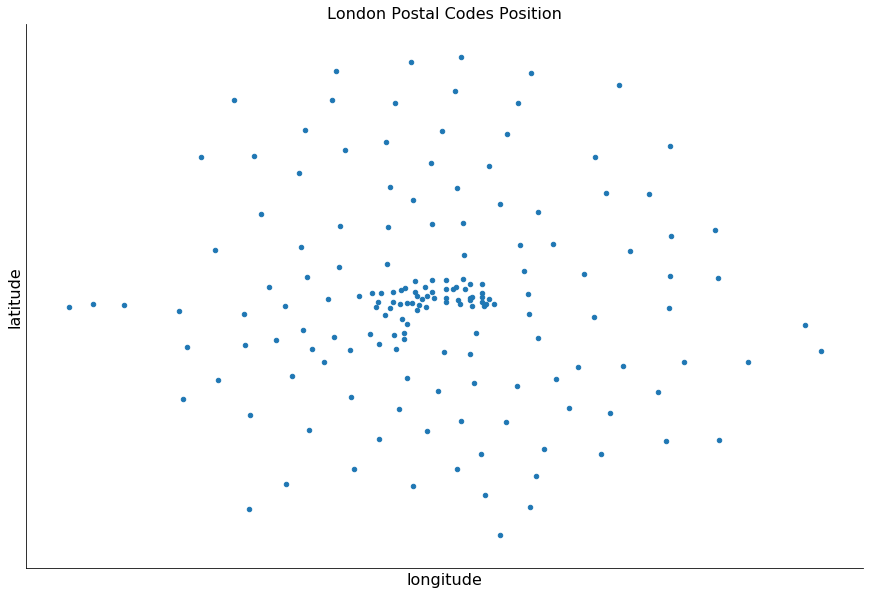

In [33]:
import matplotlib.pyplot as plt

X = postcodes_with_coordinates_df[['longitude', 'latitude']]

scatter_plot = X.plot.scatter(x='longitude', 
               y='latitude',  
               fontsize = 16,
               figsize=(15, 10))

scatter_plot.set_yticklabels([])
scatter_plot.set_xticklabels([])
scatter_plot.set_xticks([])
scatter_plot.set_yticks([])
scatter_plot.spines['top'].set_color(None)
scatter_plot.spines['right'].set_color(None)
plt.xlabel('longitude', fontsize=16)
plt.ylabel('latitude', fontsize=16)
scatter_plot.set_title('London Postal Codes Position', fontsize=16)

scatter_plot.set_yticklabels(labels = 'latitude', fontdict={'fontsize': 20})
plt.show()

To define the radius use with foursquare it's necessary to find the closest points for each postcode.

In [34]:
from geopy.distance import great_circle

#function to get the closest postcode pair and the distance using latitude and longitude
def closest_postcode(postcode, postcodes):
    postcode = np.asarray(postcode).reshape(1,-1)
    postcodes = np.asarray(postcodes)
    distances = [great_circle(postcode, point).meters for point in postcodes]
    closest_postcode_index = np.argmin(distances)
    return [round(distances[closest_postcode_index]), closest_postcode_index]

To explore the distance function, the closest postcode to the first example in the dataframe is found

In [35]:
coordinates = postcodes_with_coordinates_df[['latitude', 'longitude']]

distance, closest_point_index = closest_postcode(coordinates[:1], coordinates[~coordinates.index.isin([0])])
close_points = X[:1].append(X[closest_point_index+1:closest_point_index+2])
close_points

,longitude,latitude
0,-0.05841,51.51766
1,-0.05739,51.50775


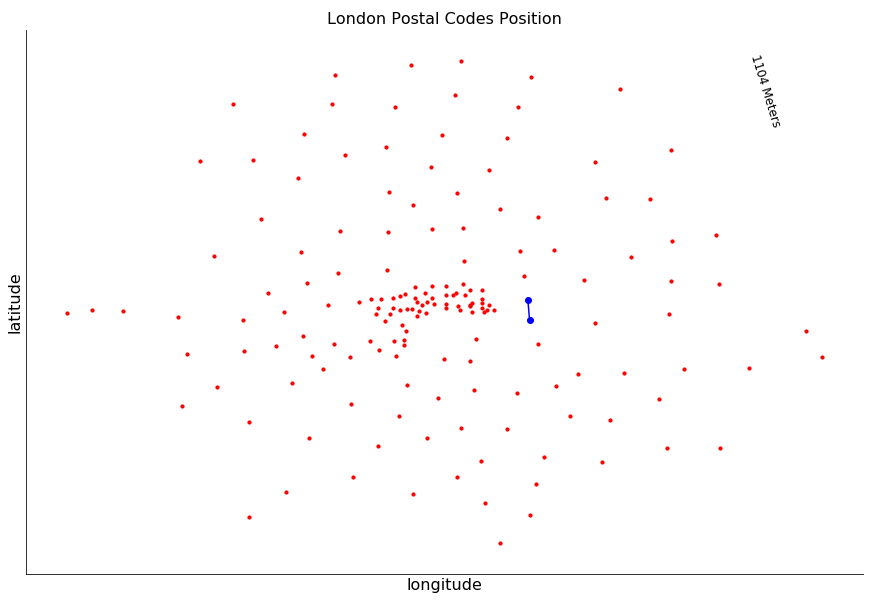

In [36]:
fig = plt.figure(figsize=(15,10))
scatter_plot = fig.add_subplot(111)
scatter_plot.scatter(X['longitude'],X['latitude'], s=10, c='r', marker="o")
scatter_plot.plot(close_points['longitude'], close_points['latitude'], c='b', marker="o")

# plt.legend(loc='upper left');
scatter_plot.annotate('{} Meters'.format(distance),
            xy=(.859, .912), xycoords='figure fraction',
            ha='left', va='top', rotation=-73,
            fontsize=12)

scatter_plot.set_yticklabels([])
scatter_plot.set_xticklabels([])
scatter_plot.set_xticks([])
scatter_plot.set_yticks([])
scatter_plot.spines['top'].set_color(None)
scatter_plot.spines['right'].set_color(None)

plt.xlabel('longitude', fontsize=16)
plt.ylabel('latitude', fontsize=16)
plt.title('London Postal Codes Position', fontsize=16)

scatter_plot.set_yticklabels(labels = 'latitude', fontdict={'fontsize': 20})
plt.show()

A distant column is added to the DataFrame and is used as the radius cover for each postcode

In [37]:
from math import isnan

for lat, lng, idx in zip(postcodes_with_coordinates_df['latitude'], postcodes_with_coordinates_df['longitude'], postcodes_with_coordinates_df.index):
    distance, closest_point_index = closest_postcode([lat,lng], coordinates[~coordinates.index.isin([idx])])
    postcodes_with_coordinates_df.at[idx,'Distance'] = np.int64(distance//2) #use the half of the disstance to avoid overlapping
    
postcodes_with_coordinates_df.head(15)

,postcode,Post town,Coverage,Neighborhood,latitude,longitude,Distance
0,E1,LONDON,"Eastern head district: Aldgate (part), Bishops...","Tower Hamlets, Hackney, City of London",51.51766,-0.05841,552.0
1,E1W,LONDON,"Wapping, St Katharine Docks, Stepney (part), S...",Tower Hamlets,51.50775,-0.05739,552.0
2,E2,LONDON,"Bethnal Green district: Bethnal Green, Haggers...","Tower Hamlets, Hackney",51.52939,-0.06080,657.0
3,E3,LONDON,"Bow district: Bow, Bow Common, Bromley-by-Bow,...","Tower Hamlets, Newham",51.52789,-0.02482,1029.0
4,E4,LONDON,"Chingford district: Chingford, Sewardstone, Hi...","Waltham Forest, Enfield, Epping Forest (Essex)",51.62196,-0.00339,1869.0
5,E5,LONDON,"Clapton district: Leyton (Part), Upper Clapton...","Hackney, Waltham Forest",51.55893,-0.05233,822.0
6,E6,LONDON,"East Ham district: East Ham, Beckton, Upton Pa...","Newham, Barking and Dagenham",51.52560,0.05583,998.0
7,E7,LONDON,"Forest Gate district: Forest Gate, Leytonstone...","Newham, Waltham Forest",51.54678,0.02793,919.0
8,E8,LONDON,"Hackney district: Hackney Central, Dalston, Lo...",Hackney,51.54202,-0.06315,700.0
9,E9,LONDON,"Homerton district: Homerton, Hackney Wick, Sou...","Hackney, Tower Hamlets",51.54258,-0.04293,700.0


The map is plotted using different radius for each postal code. Now not only overlapping was avoided but more area of the city is cover, consequently, more venues are retrieved

In [38]:
map = folium.Map(location=[51.5074,0.1278], zoom_start=11)

for location in postcodes_with_coordinates_df.itertuples(): #iterate each row of the dataframe
    label = 'postcode: {};  Coverge: {};  Neighborhoods: {}'.format(location[1], location[2], location[3])
    label = folium.Popup(label, parse_html=True)    
    folium.CircleMarker(
        [location[-3], location[-2]],
        radius=1,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map) 
    folium.Circle(
        radius=location[-1],
        popup=label,
        location=[location[-3], location[-2]],
        color='#3186cc',
        fill=True,
        fill_color='#3186cc'
    ).add_to(map) 
    
map

Next thing to do is explore each Postcode to get venues using the Foursquare API. For that, the credential must be declared

<a href='item3'></a>

## 3. Get Venues

In order to get the venues in the perimeter of each Postal code, it is necessary to get the geographical coordinates (lat and lng) of each one of those and add them to the dataframe. The geopy library is not compatible with Canada's postcode and geocoder is an unreliable library. For that reason the coordinates are in the csv file 'Geospatial_Coordinates.csv".

In [39]:
CLIENT_ID = 'HUIXUMHELPDOY0XYRWPT3XMBZLIM54IC1TUCM4RUWKFIKMZL' # your Foursquare ID
CLIENT_SECRET = '1QYPDRIYN41TVXGFBMFIMDUG1WLFW2SEDMPOYCJCP1NOCBJ1' # your Foursquare Secret
VERSION = '20191011'

To explore the data returned by the Foursquare API, a maximum of 100 venues from the first postcode are requested in a radius of 500 meters.

In [40]:
#function to format url
def format_url(lat, lng, radius=500, limit=100):
    return 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, 
        lat, lng, VERSION, radius, limit)

In [41]:
first_postcode = postcodes_with_coordinates_df.iloc[2, :]
url = format_url(first_postcode['latitude'], first_postcode['longitude'], first_postcode['Distance'])

url

'https://api.foursquare.com/v2/venues/explore?client_id=HUIXUMHELPDOY0XYRWPT3XMBZLIM54IC1TUCM4RUWKFIKMZL&client_secret=1QYPDRIYN41TVXGFBMFIMDUG1WLFW2SEDMPOYCJCP1NOCBJ1&ll=51.52939,-0.0608&v=20191011&radius=657.0&limit=100'

In [42]:
#function to get batch of venues as a dataframe
def get_venues(url):
    results = requests.get(url).json()
    venues = results['response']['groups'][0]['items']
    return json_normalize(venues)

In [43]:
venues_df = get_venues(url)

venues_df.head()

,reasons.count,reasons.items,referralId,venue.categories,venue.id,venue.location.address,venue.location.cc,venue.location.city,venue.location.country,venue.location.crossStreet,venue.location.distance,venue.location.formattedAddress,venue.location.labeledLatLngs,venue.location.lat,venue.location.lng,venue.location.neighborhood,venue.location.postalCode,venue.location.state,venue.name,venue.photos.count,venue.photos.groups,venue.venuePage.id
0,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-54ca37b2498e8c084afc73c2-0,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",54ca37b2498e8c084afc73c2,53 Old Bethnal Green Road,GB,East London,United Kingdom,Cambridge Heath,14,"[53 Old Bethnal Green Road (Cambridge Heath), ...","[{'label': 'display', 'lat': 51.52937038873192...",51.529370,-0.061001,NaN,E2 6QA,Greater London,The Common,0,[],NaN
1,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-5a89ca6c838e597879dcb341-1,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",5a89ca6c838e597879dcb341,266 Poyser Street,GB,London,United Kingdom,NaN,286,"[266 Poyser Street, London, Greater London, E2...","[{'label': 'display', 'lat': 51.52973124754724...",51.529731,-0.056693,Bethnal Green North,E2 9RF,Greater London,Sodo Pizza Cafe - Bethnal Green,0,[],NaN
2,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-526a5bd611d2be4d57a79b8c-2,"[{'id': '4bf58dd8d48988d11e941735', 'name': 'C...",526a5bd611d2be4d57a79b8c,343 Cambridge Heath Rd,GB,London,United Kingdom,NaN,333,"[343 Cambridge Heath Rd, London, Greater Londo...","[{'label': 'display', 'lat': 51.52958839622787...",51.529588,-0.055997,NaN,E2 9RA,Greater London,Satan's Whiskers,0,[],NaN
3,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4b7c2f7bf964a520e2822fe3-3,"[{'id': '4bf58dd8d48988d102941735', 'name': 'Y...",4b7c2f7bf964a520e2822fe3,449-453 Bethnal Green Road,GB,London,United Kingdom,Pundersons Gardens,311,[449-453 Bethnal Green Road (Pundersons Garden...,"[{'label': 'display', 'lat': 51.52736452183718...",51.527365,-0.057697,NaN,E2 9QH,Greater London,Yoga Place E2,0,[],NaN
4,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-543ed614498e6e2ec8fede3f-4,"[{'id': '4bf58dd8d48988d116941735', 'name': 'B...",543ed614498e6e2ec8fede3f,441 Bethnal Green Rd,GB,London,United Kingdom,NaN,293,"[441 Bethnal Green Rd, London, Greater London,...","[{'label': 'display', 'lat': 51.52725186679041...",51.527252,-0.058314,Bethnal Green,E2 0AN,Greater London,The Sun Tavern,0,[],NaN


In this case, the relevant information is venue.categories, venue.location.lat, venue.location.lng and venue.name

In [44]:
#function to clean the venues dataframe
def clean_df(df):
    relevant_columns = ['venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.name']
    clean_df = df.loc[:,relevant_columns]

    #rename columns
    clean_df.columns = ['Category', 'Lat', 'Lng', 'Name']
    return clean_df 

venues_df = clean_df(venues_df)
venues_df.head()

,Category,Lat,Lng,Name
0,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",51.529370,-0.061001,The Common
1,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",51.529731,-0.056693,Sodo Pizza Cafe - Bethnal Green
2,"[{'id': '4bf58dd8d48988d11e941735', 'name': 'C...",51.529588,-0.055997,Satan's Whiskers
3,"[{'id': '4bf58dd8d48988d102941735', 'name': 'Y...",51.527365,-0.057697,Yoga Place E2
4,"[{'id': '4bf58dd8d48988d116941735', 'name': 'B...",51.527252,-0.058314,The Sun Tavern


In [45]:
venues_df.loc[0, 'Category']

[{'id': '4bf58dd8d48988d1e0931735',
  'name': 'Coffee Shop',
  'pluralName': 'Coffee Shops',
  'shortName': 'Coffee Shop',
  'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
   'suffix': '.png'},
  'primary': True}]

It is necessary to extract the Category (shortName) of the JSON data

In [46]:
#function that extract the category name
def get_category_name(row):
    category_json = row['Category']
    try:
        return category_json[0]['name']
    except:        
        return None

venues_df['Category'] = venues_df.apply(get_category_name, axis=1)

venues_df

,Category,Lat,Lng,Name
0,Coffee Shop,51.529370,-0.061001,The Common
1,Pizza Place,51.529731,-0.056693,Sodo Pizza Cafe - Bethnal Green
2,Cocktail Bar,51.529588,-0.055997,Satan's Whiskers
3,Yoga Studio,51.527365,-0.057697,Yoga Place E2
4,Bar,51.527252,-0.058314,The Sun Tavern
5,Beer Bar,51.528413,-0.055843,Mother Kelly's Bottle Shop and Tap Room
6,Italian Restaurant,51.530298,-0.056228,Italina
7,Arepa Restaurant,51.528670,-0.056137,Arepa & Co
8,Coffee Shop,51.527412,-0.056625,Second Shot
9,Martial Arts Dojo,51.532742,-0.061472,Fight Zone


Next step is to get venues for each postal code

In [52]:
#function to construct the dataframe with all the venues (max 100 venues per postal code)
def get_all_venues(postcode, lat, lng, radius = 500):
    venues_list=[]
    for postcode, lat, lng in zip(postcode, lat, lng):
        url= format_url(lat, lng, radius)
    results = requests.get(url).json()["response"]["venues"]

    # return only relevant information for each nearby venue
    venues_list.append([(
            postcode, 
            lat, 
            lng, 
            v['postcode'], 
            v['location']['lat'], 
            v['location']['lng']) for v in results])

    all_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
   # all_venues.columns = ['postcode', 
    #              'postcode latitude', 
     #             'postcode longitude', 
    #              'Venue', 
      #            'Venue latitude', 
       #           'Venue longitude',
        #          'Venue Category'
         #         ]
    
    return all_venues



In [93]:
def getNearbyVenues(names, lat1, long1, radius=3000):

    venues_list =[]
    for name, lat, lng in zip(names, lat1, long1):

    # create the API request URL
        url1 = 'https://api.foursquare.com/v2/venues/explore?client_id=HUIXUMHELPDOY0XYRWPT3XMBZLIM54IC1TUCM4RUWKFIKMZL&client_secret=1QYPDRIYN41TVXGFBMFIMDUG1WLFW2SEDMPOYCJCP1NOCBJ1&ll=51.52939,-0.0608&v=20191011&radius=657.0&limit=100'


    # make the GET request
    results = requests.get(url1).json()['response']#['venues']

    # return only relevant information for each nearby venue
    venues_list.append([(
        name, 
        lat, 
        lng, 
        v['name'], 
        v['venue']['Lat'], 
        v['venue']['Lng']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])

    return(nearby_venues)

In [94]:
get_all_venues = getNearbyVenues(postcodes_with_coordinates_df['postcode'], postcodes_with_coordinates_df['latitude'], postcodes_with_coordinates_df['longitude'], postcodes_with_coordinates_df['Distance'])

print('The total number of venues returned is ', all_venues.shape[0])

all_venues.head(10)

TypeError: string indices must be integers

In [30]:
print('Total London postcodes:', postcodes_with_coordinates_df['Postcode'].shape[0])
print('Total London postcodes with venues:', all_venues['Postcode'].unique().shape[0])

Total Toronto postcodes: 103
Total Toronto postcodes with venues: 102


There is one postal code with no venues returned from the Foursquare API

In [95]:
postcodes_diff = np.setdiff1d(postcodes_with_coordinates_df['Postcode'].values,all_venues['Postcode'].unique())
postcodes_with_coordinates_df[postcodes_with_coordinates_df['Postcode']==postcodes_diff[0]]


KeyboardInterrupt



<a id="item4"></a>

## 4. Analyze venues data

In order to get a better sense of the best way of clustering the postalcodes, it's necessary to analyze the venues data returned by Foursquare.

In [96]:
venues_in_postcode = all_venues.groupby('Postcode').count()
venues_in_postcode = pd.DataFrame(list(zip(venues_in_postcode.index, venues_in_postcode['Venue'])), 
                                  columns=['Postcode', '# of Venues']).set_index('Postcode').join(postcodes_with_coordinates_df[['Postcode','Distance']].set_index('Postcode'), on='Postcode').reset_index()
venues_in_postcode['Distance'] = np.int64(venues_in_postcode['Distance'])
venues_in_postcode.loc[len(venues_in_postcode.index)] = ['M5E', 0, 111] #add M5E (postcode without venues) with zero as # of venues

venues_in_postcode.head(10)

AttributeError: 'function' object has no attribute 'groupby'

In [97]:
venues_in_postcode[['# of Venues']].describe()

NameError: name 'venues_in_postcode' is not defined

The minimum amount of venues present on a postcode is 0, as we add M5E, and the maximum is 100, expected given the limit of venues set on the request sent to the Foursquare API. 50% of the venues presents 26 or less venues. 

The venues Frequency Distribution of the number of venues is presented next

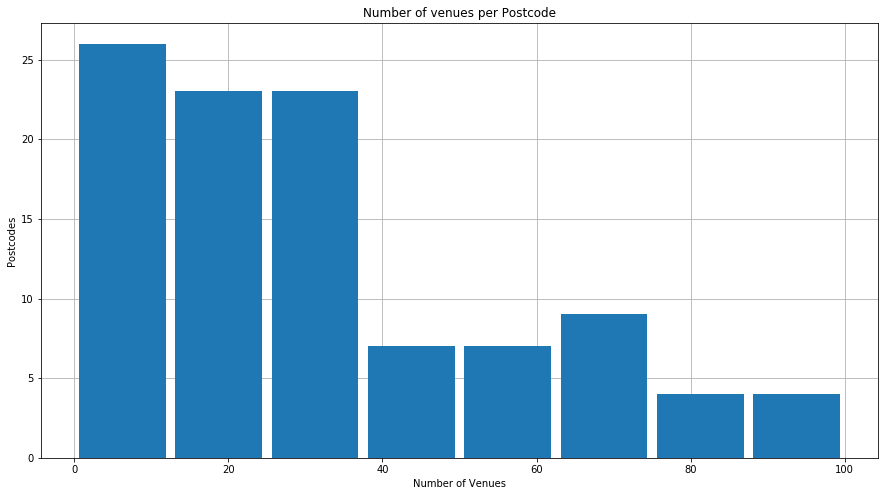

In [34]:
venues_in_postcode['# of Venues'].hist(bins=8, figsize=(15,8),zorder=2, rwidth=0.9)

plt.xlabel('Number of Venues')
plt.ylabel('Postcodes')
plt.title('Number of venues per Postcode')
plt.show()

Given that each postcode has a different radius passed to the venues request, it's better to represent the venues per postcode in terms of density, that's venues per are cover for each postcode, in this case the area cover in the venues search defined by the distance to the closest postcode.

In [98]:
density_venues_in_postcode = all_venues.groupby('Postcode').count()

density_venues_in_postcode = pd.DataFrame(list(zip(density_venues_in_postcode.index, density_venues_in_postcode['Venue'])), 
                                  columns=['Postcode', 'Density']).set_index('Postcode').join(postcodes_with_coordinates_df[['Postcode','Distance']].set_index('Postcode'), on='Postcode').reset_index()
density_venues_in_postcode['Density'] = np.int64(density_venues_in_postcode['Density']/(density_venues_in_postcode['Distance']/1000)) #distance in km
density_venues_in_postcode.loc[len(venues_in_postcode.index)] = ['M5E', 0, 111] #add M5E (postcode without venues) with zero as density

density_venues_in_postcode.head(10)

AttributeError: 'function' object has no attribute 'groupby'

In [50]:
density_venues_in_postcode[['Density']].describe()

,Density
count,103.000000
mean,45.262136
std,47.051903
min,0.000000
25%,14.000000
50%,29.000000
75%,61.500000
max,237.000000


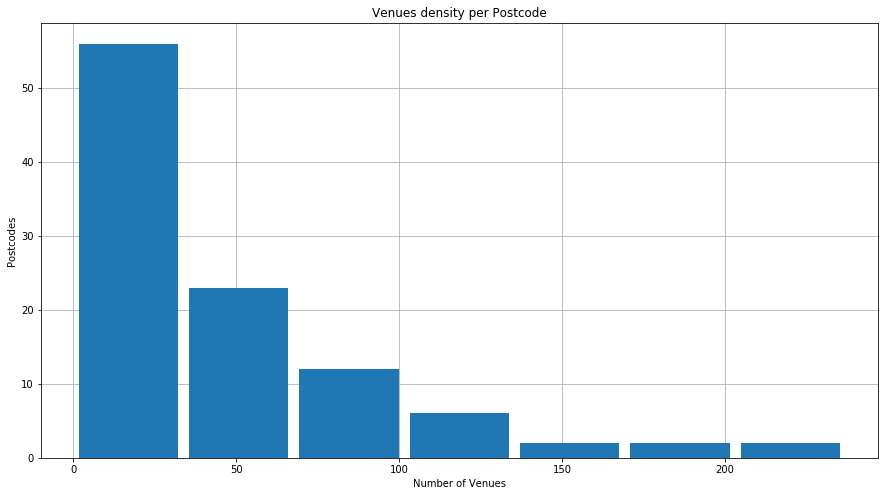

In [51]:
density_venues_in_postcode['Density'].hist(bins=7, figsize=(15,8),zorder=2, rwidth=0.9)

plt.xlabel('Number of Venues')
plt.ylabel('Postcodes')
plt.title('Venues density per Postcode')
plt.show()

THe histogram shows that 60% of the postcodes presents a density between 0 and 30 venues per area (expressed as radius). That is expected given that Toronto has a low population density. The last three bars on the plot have very low values, it could be possible to merge that data and use 5 venues density ranges for the clustering

<a id="item4"></a>

## 5. Cluster Postcodes

Next the postcodes are clustered based on venues density. One important hyperparameter is the number of clusters and based on previous analysis a tentative value is five clusters. Next the elbow method is used to have a better sense of the optimal number.

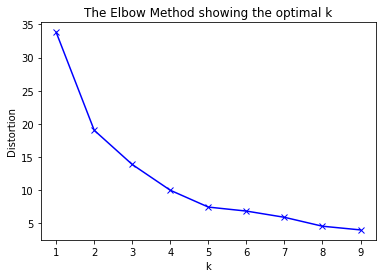

In [38]:
from sklearn import metrics
from scipy.spatial.distance import cdist

distortions = []
K = range(1,10)
for k in K:
    k_means = KMeans(init = "k-means++", n_clusters = k, n_init = 12)
    k_means.fit(density_venues_in_postcode['Density'].values.reshape(-1, 1))
    distortions.append(sum(np.min(cdist(density_venues_in_postcode['Density'].values.reshape(-1, 1),
                                        k_means.cluster_centers_, 'euclidean'), axis=1)) / density_venues_in_postcode['Density'].shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Using the elbow method, the optimal value of the number of cluster was defined as 5, which match with the value based on the histogram analysis.

In [39]:
num_clusters = 5

k_means = KMeans(init = "k-means++", n_clusters = num_clusters, n_init = 12)
k_means.fit(density_venues_in_postcode['Density'].values.reshape(-1, 1))
labels = k_means.labels_

print(labels)

[3 3 3 3 1 3 1 1 3 3 1 1 1 1 1 1 3 1 1 3 3 1 4 1 1 1 1 1 1 1 3 3 3 3 3 3 3
 0 0 1 1 4 1 4 3 3 1 0 3 0 3 4 2 4 2 4 0 4 2 0 4 1 3 3 0 0 2 1 0 0 0 1 3 1
 1 1 4 4 3 3 1 0 0 0 1 1 1 1 1 1 3 0 3 3 3 3 3 3 3 3 3 3 3]


In [99]:
density_venues_in_postcode['Cluster'] = k_means.labels_
density_venues_in_postcode.head(10)

NameError: name 'k_means' is not defined

<a id="item4"></a>

## 6. Examine clusters

Check the centroids values of venues density and postcodes per cluster

In [41]:
centroids = np.int64(round(density_venues_in_postcode.groupby('Cluster').mean()['Density']))
frecuency = density_venues_in_postcode.groupby('Cluster').count()['Postcode']

cluster_info = pd.DataFrame([np.arange(0,5), centroids, frecuency], index=['Cluster', 'Centroid','Postcodes']).T
cluster_info.sort_values('Centroid', inplace=True)
cluster_info.reset_index(drop=True, inplace=True)

cluster_info

,Cluster,Centroid,Postcodes
0,3,11,38
1,1,33,36
2,0,72,15
3,4,114,10
4,2,211,4


Based on the centroids of each cluster, the cluster names can be defined as:
1. __'Low Venues Density':__ Centroid equal to 11
2. __'Medium-Low Venues Density'__ with a centroid equal to 33
3. __'Medium-High Venues Density'__ with a centroid equal to 72
4. __'High Venues Density'__ with a centr0id equal to 114
5. __'Very High Venues Density'__ with a centroid equal to 211

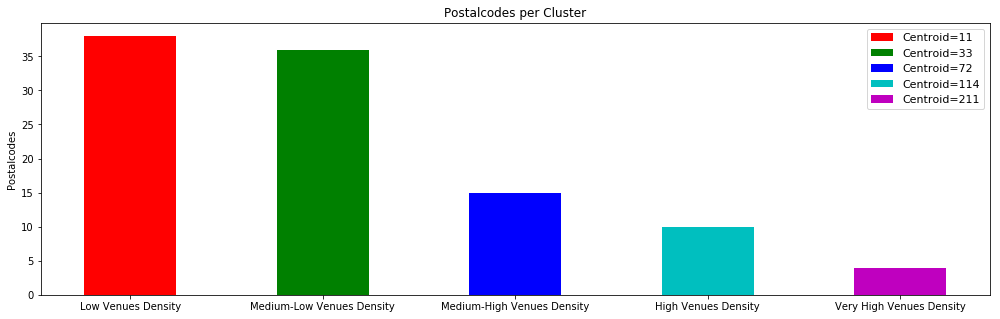

In [45]:
fig, ax = plt.subplots(figsize=(17,5))
clusters= ['Low Venues Density','Medium-Low Venues Density','Medium-High Venues Density','High Venues Density','Very High Venues Density']
colors = ['r','g','b','c','m']
legend = []

for id, cluster in enumerate(clusters):
    legend.append('Centroid={}'.format(cluster_info['Centroid'][id]))
    bar = ax.bar(cluster, cluster_info['Postcodes'][id], 0.48, color=colors[id])

ax.set_ylabel('Postalcodes')
ax.set_title('Postalcodes per Cluster')
# ax.set_facecolor((1,1,1))
# ax.grid(True, axis='y',color='k', linestyle='-', linewidth=1)

plt.legend(legend, fontsize=11)

plt.show()

In [47]:
postcodes_with_coordinates_df = pd.concat([postcodes_with_coordinates_df[:56],postcodes_with_coordinates_df[57:],postcodes_with_coordinates_df[56:57]]) #move M5E to the last row
postcodes_with_coordinates_df['Cluster'] = k_means.labels_

colors = ['red','green','blue','cyan','magenta']
clusters_values = cluster_info['Cluster']

map = folium.Map(location=[43.6532,-79.3832], zoom_start=11)

for location in postcodes_with_coordinates_df.itertuples(): #iterate each row of the dataframe
    cluster_index = clusters_values.index[clusters_values==location[-1]][0]
    label = 'Postal Code: {};  Borough: {};  Neighborhoods: {}; {}'.format(location[1], location[2], location[3], clusters[cluster_index])
    label = folium.Popup(label, parse_html=True)    
    folium.Circle(
        radius=location[-2],
        popup=label,
        location=[location[-4], location[-3]],
        color=None,
        fill=True,
        fill_opacity=0.4,
        fill_color=colors[cluster_index]
    ).add_to(map) 

map

### Usage

The results showed on the map could be useful, among others, in:
1. Real estate: as part of property cost model (venues density could be related to the cost of a property) or as a tool for property search. 
2. Epidemiology research: venues density could be related with noise, pollution or crime.
